****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      44.7764
NDf                       =           54
Edm                       =  3.53541e-09
NCalls                    =           81
p0                        =      40.7556   +/-   1.66912     
p1                        =    0.0263899   +/-   0.06215     
p2                        =       1.8799   +/-   0.0492635   


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


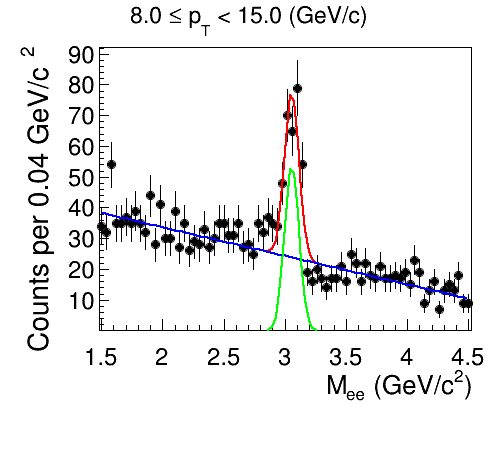

In [7]:
import ROOT

hist = ROOT.TH1F("hist", "Ajuste Gaussiano", 100, -10, 10)
for i in range(1000):
    hist.Fill(ROOT.gRandom.Gaus(0, 2)) 


fit_func = ROOT.TF1("fit_func", "[0]*exp(-0.5*((x-[1])/[2])**2)", -10, 10)
fit_func.SetParameters(100, 0, 2)  
hist.Fit(fit_func, "R") 

canvas = ROOT.TCanvas("canvas", "Ajuste Gaussiano", 800, 600)
hist.Draw()
fit_func.Draw("same")  
canvas.Draw()

In [8]:
import ROOT

# Abra o arquivo ROOT
file = ROOT.TFile.Open("Inv_mass_exemplo_INCT_dia2.root")

# Acesse o histograma TH1D dentro do arquivo
hist = file.Get("ULS")

file.ls()

if not isinstance(hist, ROOT.TH1D):
    print("O objeto não é um histograma TH1D.")

# Verifique se o histograma foi carregado corretamente
if hist:
    # Imprimir algumas informações sobre o histograma
    print("Nome do histograma:", hist.GetName())
    print("Número de bins:", hist.GetNbinsX())
    print("Contagem no primeiro bin:", hist.GetBinContent(1))

    canvas = ROOT.TCanvas("canvas", "Histograma", 500, 500)
    canvas.SetLeftMargin(0.2)   # Aumentar a margem esquerda para o título do eixo Y
    canvas.SetRightMargin(0.05)  # Margem direita menor (opcional)
    canvas.SetTopMargin(0.1)     # Margem superior (ajustar para dar espaço ao título)
    canvas.SetBottomMargin(0.3) # Aumentar a margem inferior para o título do eixo X


    hist.Draw()

    canvas.Update()

else:
    print("Histograma não encontrado.")


# Crie a função ROOT.TF1
fit_func = ROOT.TF1("fit_func", "[0]*exp(-0.5*((x-[1])/[2])**2) + [3] + [4] * x + [5] * x**2 ", 1.5, 4.5, 6)


# Defina os parâmetros iniciais para o ajuste:
# par[0]: amplitude da Gaussiana
# par[1]: média da Gaussiana
# par[2]: sigma da Gaussiana
# par[3], par[4], par[5]: coeficientes do polinômio de grau 2

fit_func.SetParameters(80, 3.09, 0.2, 1, 1, 1)  # Definir valores iniciais dos parâmetros

# Ajuste a função ao histograma
hist.Fit(fit_func, "R")  # "R" restringe o ajuste ao intervalo da função

print(fit_func.GetParameter(0))


# Acessar os parâmetros da função ajustada gauss
amplitude = fit_func.GetParameter(0)  # Parâmetro 0: Amplitude
media = fit_func.GetParameter(1)      # Parâmetro 1: Média
desvio_padrao = fit_func.GetParameter(2)  # Parâmetro 2: Desvio padrão

gauss = ROOT.TF1("gauss", "[0]*exp(-0.5*((x-[1])/[2])**2)", 1.5, 4.5, 3)
gauss.FixParameter(0, amplitude)
gauss.FixParameter(1, media)
gauss.FixParameter(2, desvio_padrao)

print(amplitude, media, desvio_padrao)

# Acessar os parâmetros da função ajustada pol 2: a + bx + cxx
a = fit_func.GetParameter(3)      # a
b = fit_func.GetParameter(4)      # b
c = fit_func.GetParameter(5)      # c

print(a, b, c)

pol2 = ROOT.TF1("pol2", "[0] + [1] * x + [2] * x**2 ", 1.5, 4.5, 3)
pol2.FixParameter(0, a);
pol2.FixParameter(1, b);
pol2.FixParameter(2, c);



# Desenhe o histograma e o ajuste

fit_func.Draw("same")  # Desenha a função ajustada na mesma janela
pol2.SetLineColor(ROOT.kBlue)  # Define a cor
pol2.SetLineWidth(2)         # Define a largura da linha
pol2.SetLineStyle(1)         # Define o estilo da linha (1 = linha sólida)
pol2.Draw("same")

canvas.Update()

gauss.SetLineColor(ROOT.kGreen)
gauss.SetLineWidth(2)
gauss.SetLineStyle(1)
gauss.Draw("same")

canvas.Draw()

Nome do histograma: h0b
Número de bins: 375
Contagem no primeiro bin: 4611.0
53.69881496675169
53.69881496675169 3.056653457981964 -0.05908221736586557
52.30124204145819 -9.408827354752585 0.01820491741149125
TNetXNGFile**		root://eoshome-i00.cern.ch//eos/user/t/tdeandra/SWAN_projects/INCT CERN/aula 2/Inv_mass_exemplo_INCT_dia2.root	
 TNetXNGFile*		root://eoshome-i00.cern.ch//eos/user/t/tdeandra/SWAN_projects/INCT CERN/aula 2/Inv_mass_exemplo_INCT_dia2.root	
  OBJ: TH1D	h0b	8.0 #leq p_{T} < 15.0 (GeV/c) : 0 at: 0xbdde980
  KEY: TH1D	ULS;1	8.0 #leq p_{T} < 15.0 (GeV/c)
  KEY: TH1D	LS;1	Inv.Mass Pair_ev1+_ev1+
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      73.9831
NDf                       =           70
Edm                       =  2.04689e-08
NCalls                    =         1008
p0                        =      53.6988   +/-   5.97227     
p1                        =      3.05665   +/-   0.00774522  
p2                       

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


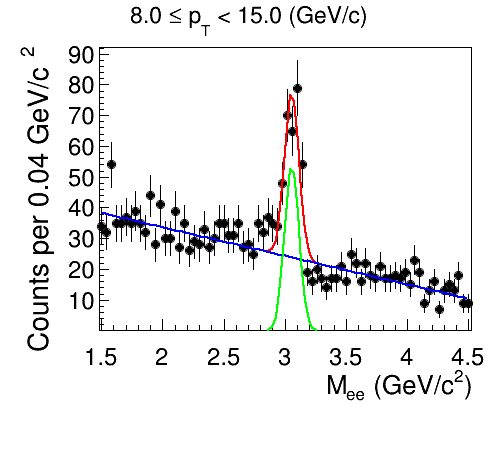

In [9]:
canvas.Draw()